<a href="https://colab.research.google.com/github/arohmishra/email-spam/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = r'/content/combined_data.csv'

In [ ]:
df = pd.read_csv(data)

In [ ]:
df.head(5)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [ ]:
df.shape

(83448, 2)

In [ ]:
df.size

166896

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,label
count,83448.000000
mean,0.526196
std,0.499316
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
df.isnull().sum()

,0
label,0
text,0


In [ ]:
# '1' indicates that the email is classified as spam.
# '0' denotes that the email is legitimate (ham).

In [ ]:
df['label'].value_counts()

,count
label,
1,43910
0,39538


In [ ]:
df.head(1)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

([<matplotlib.axis.XTick at 0x7cd067364910>,
 [Text(0, 0, '(0) ham'), Text(1, 0, '(1) spam')])

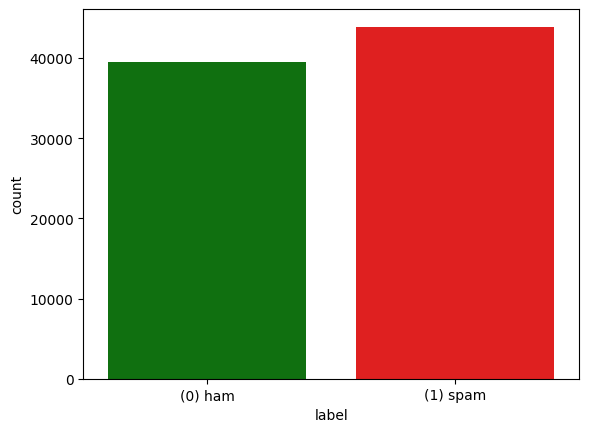

In [ ]:
sns.barplot(x = df['label'].value_counts().index, y = df['label'].value_counts(), palette=['green', 'red'])
plt.xticks([0, 1], labels = ['(0) ham', '(1) spam'])

In [ ]:
df['label'].value_counts()

,count
label,
1,43910
0,39538


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words = 'english')

In [ ]:
X = vectorizer.fit_transform(df['text'])
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# evalution
accuracy = accuracy_score(y_test, predict)

In [ ]:
accuracy

0.9864994408052404

In [ ]:
round(accuracy * 100, 2)

98.65

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, predict)

array([[5820,  137],
       [  32, 6529]])

Text(0.5, 1.0, 'Confusion Matrix')

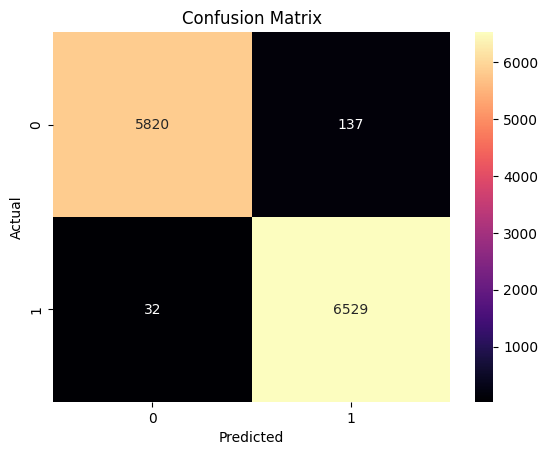

In [ ]:
sns.heatmap(confusion_matrix(y_test, predict), annot = True, fmt = 'd', cmap = 'magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')